Average BMI by region:
region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

Average cost of insurance by region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Charges by number of children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

Correlation between number of children and charges:
0.0679982268479048

Average age of all respondents:
39.20702541106129

Average age by sex:
sex
female    39.503021
male      38.917160
Name: age, dtype: float64

Correlation between BMI and number of children:


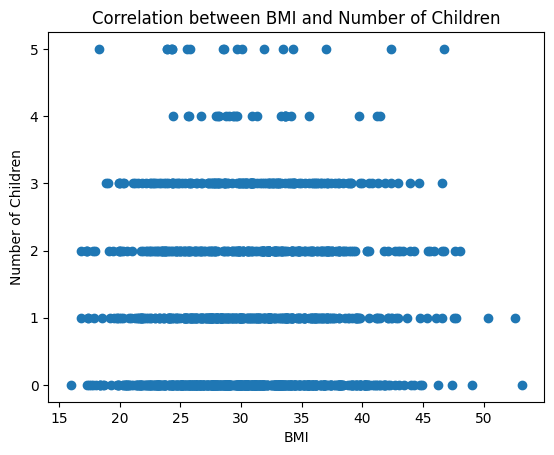


Correlation graph between children and charges:


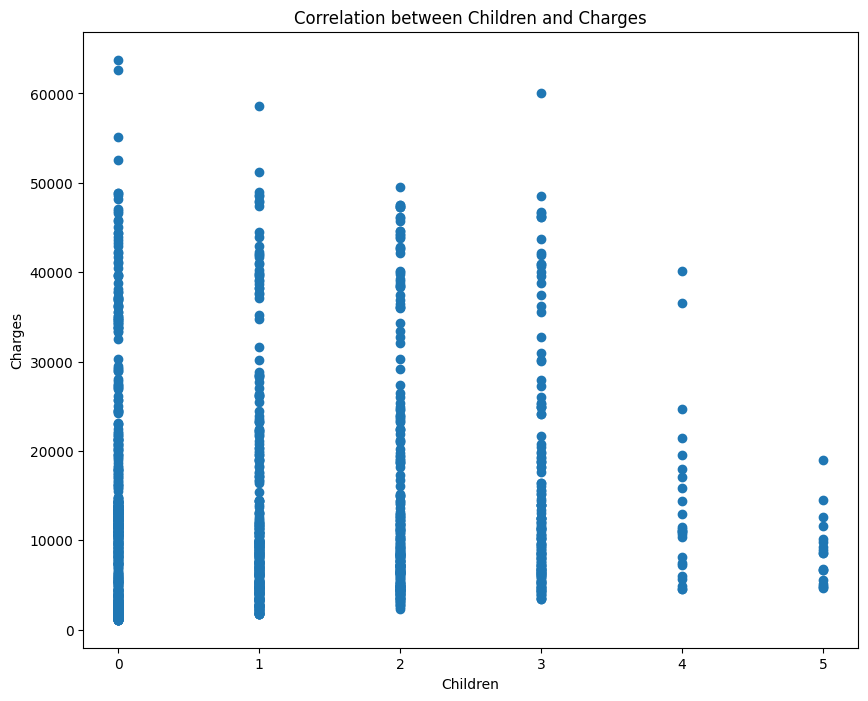


Bar graph of average charges by region:


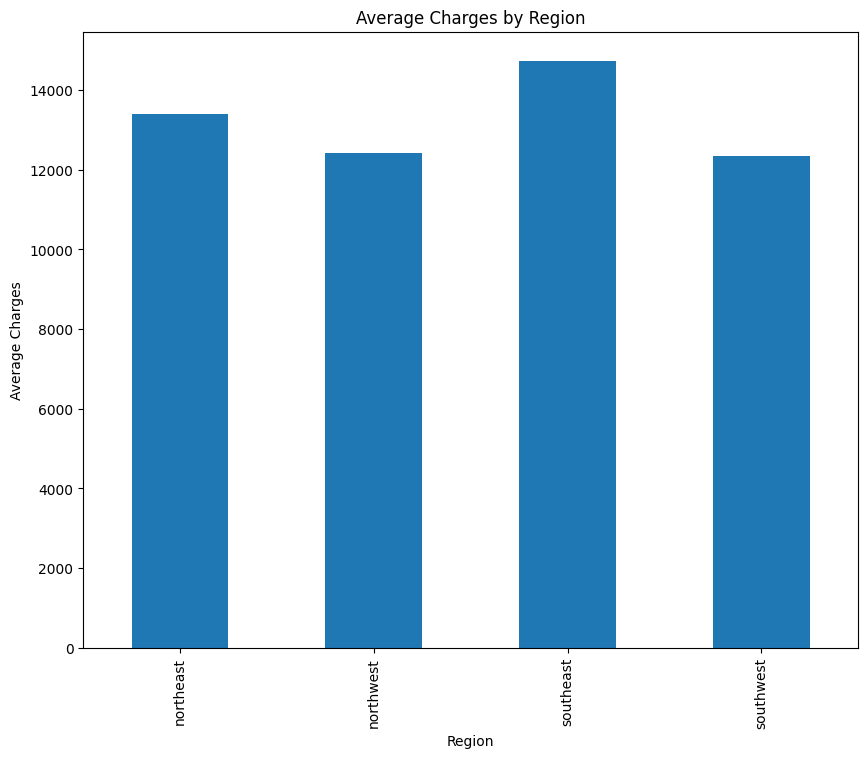


Bar graph of average charges by number of children:


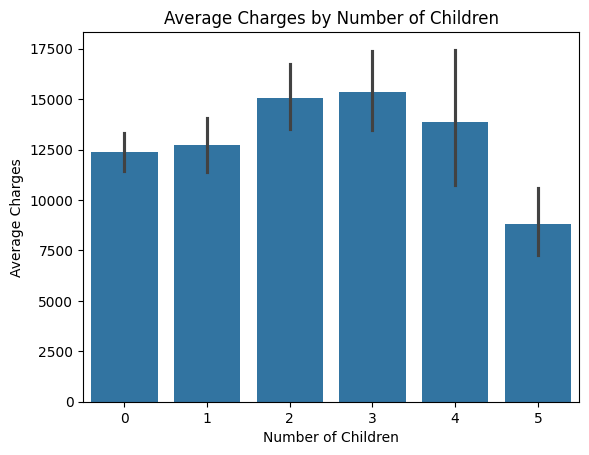


Box plot of average BMI by region:


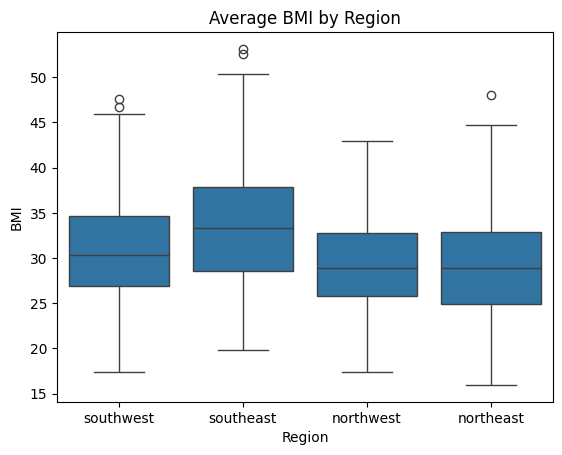

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

class InsuranceData:
    def __init__(self, file_path: str):
        self.data = pd.read_csv(file_path)

class InsuranceStats:
    def __init__(self, data: pd.DataFrame):
        self.data = data

    # --------- What is the average BMI by region? --------------------------
    def region_bmi(self):
        return self.data.groupby('region')['bmi'].mean()   

    # --------- What is the average cost of insurance by region? -------
    def region_cost(self):
        return self.data.groupby('region')['charges'].mean()
    
    # --------- In what ways does number of children impact charges? -------
    def children_charges(self):
        return self.data.groupby('children')['charges'].mean()

    def children_charges_correlation(self):
        return self.data['children'].corr(self.data['charges'])

    # --------- What is the average age of all respondents? -----------
    def mean_age(self):
        return self.data['age'].mean()

    # -- Average age of each sex? --
    def mean_age_sex(self):
        return self.data.groupby('sex')['age'].mean()

    # --------- Is bmi correlated with number of children? ----------
    def correlation_bmi_children(self):
        plt.figsize=(10, 8)
        plt.scatter(self.data['bmi'], self.data['children'])
        plt.title('Correlation between BMI and Number of Children')
        plt.xlabel('BMI')
        plt.ylabel('Number of Children')
        plt.show()

    def correlation_graph2(self):
        plt.figure(figsize=(10, 8))
        plt.scatter(self.data['children'], self.data['charges'])
        plt.title('Correlation between Children and Charges')
        plt.xlabel('Children')
        plt.ylabel('Charges')
        plt.show()

    def bar_graph(self):
        plt.figure(figsize=(10, 8))
        self.data.groupby('region')['charges'].mean().plot(kind='bar')
        plt.title('Average Charges by Region')
        plt.xlabel('Region')
        plt.ylabel('Average Charges')
        plt.show()
    
    def bar_graph2(self):
        sns.barplot(x='children', y='charges', data=self.data)
        plt.title('Average Charges by Number of Children')
        plt.xlabel('Number of Children')
        plt.ylabel('Average Charges')
        plt.show()

    def box_plot(self):
        sns.boxplot(x='region', y='bmi', data=self.data)
        plt.title('Average BMI by Region')
        plt.xlabel('Region')
        plt.ylabel('BMI')
        plt.show()

# Execution
insurance = InsuranceData('insurance.csv')
insurance_stats = InsuranceStats(insurance.data)

# Usage
print("Average BMI by region:")
print(insurance_stats.region_bmi())

print("\nAverage cost of insurance by region:")
print(insurance_stats.region_cost())

print("\nCharges by number of children:")
print(insurance_stats.children_charges())

print("\nCorrelation between number of children and charges:")
print(insurance_stats.children_charges_correlation())

print("\nAverage age of all respondents:")
print(insurance_stats.mean_age())

print("\nAverage age by sex:")
print(insurance_stats.mean_age_sex())

print("\nCorrelation between BMI and number of children:")
insurance_stats.correlation_bmi_children()

print("\nCorrelation graph between children and charges:")
insurance_stats.correlation_graph2()

print("\nBar graph of average charges by region:")
insurance_stats.bar_graph()

print("\nBar graph of average charges by number of children:")
insurance_stats.bar_graph2()

print("\nBox plot of average BMI by region:")
insurance_stats.box_plot()